# RfSolar California Energy

Source: https://www.kaggle.com/la-times/california-electricity-capacity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
import glob as glob
file_names = glob.glob('../data/california-electricity-capacity/*')
file_names

In [ ]:
glob.glob('../data/caiso/*')

In [5]:
caiso_transimission_usage = pd.read_csv('../data/caiso/20200801_20200801_TRNS_CURR_USAGE_N_v1.csv')

In [6]:
caiso_transimission_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124800 entries, 0 to 124799
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   OPR_DT                 124800 non-null  object
 1   OPR_HR                 124800 non-null  int64 
 2   INTERVALSTARTTIME_GMT  124800 non-null  object
 3   INTERVALENDTIME_GMT    124800 non-null  object
 4   TI_ID                  124800 non-null  object
 5   TI_DIRECTION           124800 non-null  object
 6   MARKET_RUN_ID          124800 non-null  object
 7   TI_CONSTRAINT_ID       124800 non-null  object
 8   TR_TYPE                124800 non-null  object
 9   XML_DATA_ITEM          124800 non-null  object
 10  LABEL                  124800 non-null  object
 11  POS                    124800 non-null  int64 
 12  OPR_INTERVAL           124800 non-null  int64 
 13  MW                     124800 non-null  int64 
 14  GROUP                  124800 non-null  int64 
dtype

In [7]:
caiso_transimission_usage[caiso_transimission_usage['GROUP'] == 1]

,OPR_DT,OPR_HR,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,TI_ID,TI_DIRECTION,MARKET_RUN_ID,TI_CONSTRAINT_ID,TR_TYPE,XML_DATA_ITEM,LABEL,POS,OPR_INTERVAL,MW,GROUP
0,2020-08-01,24,2020-08-02T06:30:00-00:00,2020-08-02T06:45:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,3,0,1
1,2020-08-01,24,2020-08-02T06:45:00-00:00,2020-08-02T07:00:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,4,0,1
2,2020-08-01,24,2020-08-02T06:00:00-00:00,2020-08-02T06:15:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,1,0,1
3,2020-08-01,23,2020-08-02T05:45:00-00:00,2020-08-02T06:00:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,4,0,1
4,2020-08-01,23,2020-08-02T05:00:00-00:00,2020-08-02T05:15:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020-08-01,10,2020-08-01T16:15:00-00:00,2020-08-01T16:30:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,2,0,1
92,2020-08-01,10,2020-08-01T16:30:00-00:00,2020-08-01T16:45:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,3,0,1
93,2020-08-01,8,2020-08-01T14:30:00-00:00,2020-08-01T14:45:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,3,0,1
94,2020-08-01,8,2020-08-01T14:45:00-00:00,2020-08-01T15:00:00-00:00,ADLANTO-SP_ITC,E,RTPD,ADLANTO-SP_ITC,TRNS_AS_IMPORT_IFM,AS_IMPORT_MW,AS from Imports,10,4,0,1


# Annual Capacity in CA

In [8]:
ca_capacity = pd.read_csv('../data/california-electricity-capacity/annual-capacity-california.csv')

In [9]:
ca_capacity.head()

,Year,State Code,Producer Type,Fuel Source,Generators,Facilities,Nameplate Capacity (Megawatts),Summer Capacity (Megawatts)
0,1990,CA,Total Electric Power Industry,All Sources,NaN,739.0,55025.84,53215.03
1,1991,CA,Total Electric Power Industry,All Sources,NaN,731.0,55293.64,53444.40
2,1992,CA,Total Electric Power Industry,All Sources,NaN,748.0,55284.19,53696.18
3,1993,CA,Total Electric Power Industry,All Sources,NaN,753.0,56054.06,54405.14
4,1994,CA,Total Electric Power Industry,All Sources,NaN,758.0,55250.53,53456.43


### Facilities vs Capacity

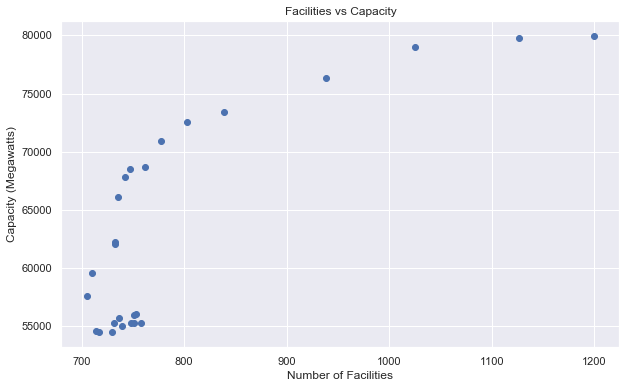

In [10]:
_ = plt.figure(figsize=(10,6))
_ = plt.scatter(x='Facilities', y='Nameplate Capacity (Megawatts)', data=ca_capacity)
_ = plt.title('Facilities vs Capacity')
_ = plt.xlabel('Number of Facilities')
_ = plt.ylabel('Capacity (Megawatts)')

# Annual Customers in CA

In [11]:
ca_customers = pd.read_csv('../data/california-electricity-capacity/annual-customers-california.csv').sort_values('Year').reset_index(drop=1)

In [12]:
ca_customers.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,1990,CA,Total Electric Industry,10493065,1383600,37864,NaN,47706.0,11962235
1,1991,CA,Total Electric Industry,10727574,1397669,34191,NaN,45568.0,12205002
2,1992,CA,Total Electric Industry,10761143,1469223,37826,NaN,47789.0,12315981
3,1993,CA,Total Electric Industry,10841305,1464438,38906,NaN,44893.0,12389542
4,1994,CA,Total Electric Industry,10896519,1470956,39300,NaN,48660.0,12455435


# Annual Price CA vs US

In [13]:
ca_price_vs_us = pd.read_csv('../data/california-electricity-capacity/annual-price-california-vs-usa.csv')

In [14]:
ca_price_vs_us.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Total (2015 dollars)
0,1990,CA,Total Electric Industry,9.98,9.46,7.28,NaN,4.53,8.84,16.034839
1,1991,CA,Total Electric Industry,10.79,10.04,7.58,NaN,5.05,9.42,16.395602
2,1992,CA,Total Electric Industry,11.07,10.33,7.59,NaN,5.54,9.66,16.317102
3,1993,CA,Total Electric Industry,11.30,10.46,7.33,NaN,5.05,9.69,15.895691
4,1994,CA,Total Electric Industry,11.43,10.90,7.09,NaN,5.00,9.78,15.637443


In [54]:
ca_prices = ca_price_vs_us[ca_price_vs_us['State'] == 'CA']
ca_prices = ca_prices.set_index('Year').iloc[:,2:]
ca_prices.columns = ca_prices.columns + ' (CA)'

us_prices = ca_price_vs_us[ca_price_vs_us['State'] == 'US']
us_prices = us_prices.set_index('Year').iloc[:,2:]
us_prices.columns = us_prices.columns + ' (US)'

In [57]:
ca_us_pricing = pd.merge(ca_prices, us_prices, left_index=True, right_index=True)

In [58]:
ca_us_pricing.head()

,Residential (CA),Commercial (CA),Industrial (CA),Transportation (CA),Other (CA),Total (CA),Total (2015 dollars) (CA),Residential (US),Commercial (US),Industrial (US),Transportation (US),Other (US),Total (US),Total (2015 dollars) (US)
Year,,,,,,,,,,,,,,
1990,9.98,9.46,7.28,NaN,4.53,8.84,16.034839,7.83,7.34,4.74,NaN,6.40,6.57,11.917296
1991,10.79,10.04,7.58,NaN,5.05,9.42,16.395602,8.04,7.53,4.83,NaN,6.51,6.75,11.748441
1992,11.07,10.33,7.59,NaN,5.54,9.66,16.317102,8.21,7.66,4.83,NaN,6.74,6.82,11.519942
1993,11.30,10.46,7.33,NaN,5.05,9.69,15.895691,8.32,7.74,4.85,NaN,6.88,6.93,11.368126
1994,11.43,10.90,7.09,NaN,5.00,9.78,15.637443,8.38,7.73,4.77,NaN,6.84,6.91,11.048541


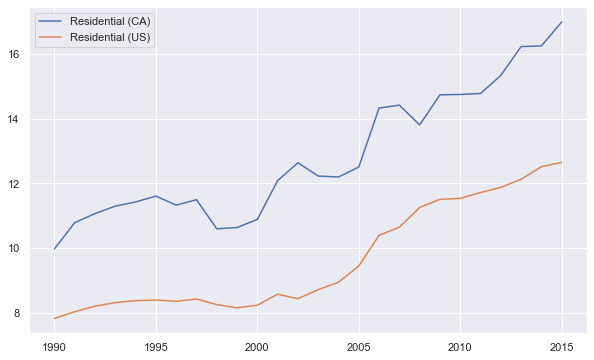

In [68]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(ca_us_pricing[[x for x in ca_us_pricing.columns if 'Residential' in x]])
_ = plt.legend([x for x in ca_us_pricing.columns if 'Residential' in x])

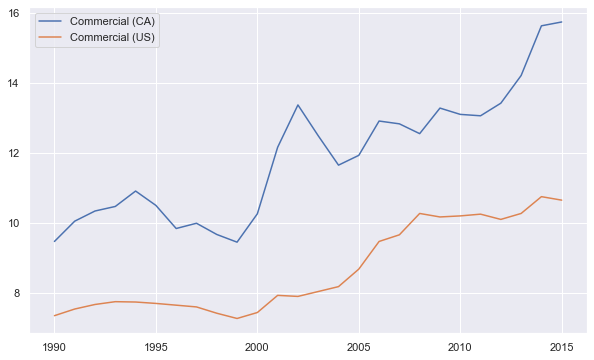

In [69]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(ca_us_pricing[[x for x in ca_us_pricing.columns if 'Commercial ' in x]])
_ = plt.legend([x for x in ca_us_pricing.columns if 'Commercial ' in x])

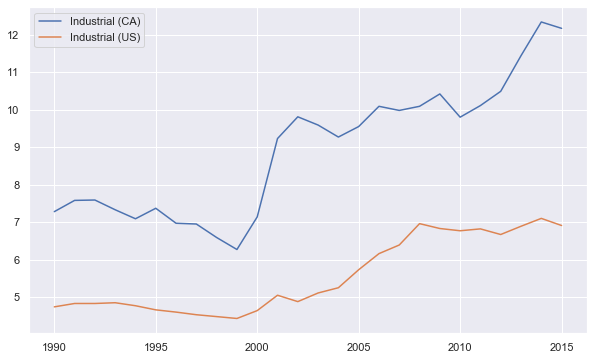

In [74]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(ca_us_pricing[[x for x in ca_us_pricing.columns if 'Industrial' in x]])
_ = plt.legend([x for x in ca_us_pricing.columns if 'Industrial ' in x])

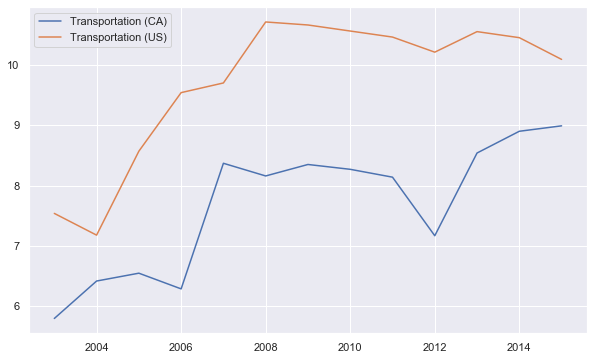

In [73]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(ca_us_pricing[[x for x in ca_us_pricing.columns if 'Transportation' in x]])
_ = plt.legend([x for x in ca_us_pricing.columns if 'Transportation ' in x])

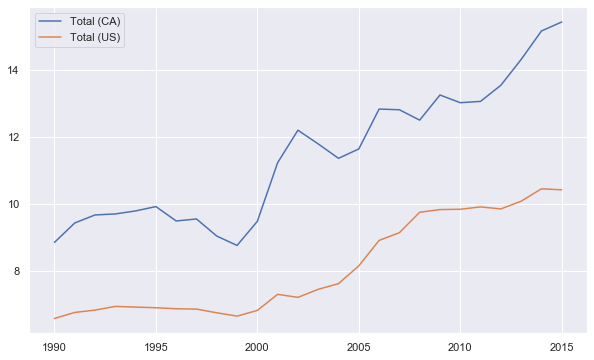

In [71]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(ca_us_pricing[['Total (CA)','Total (US)']])
_ = plt.legend(['Total (CA)','Total (US)'])

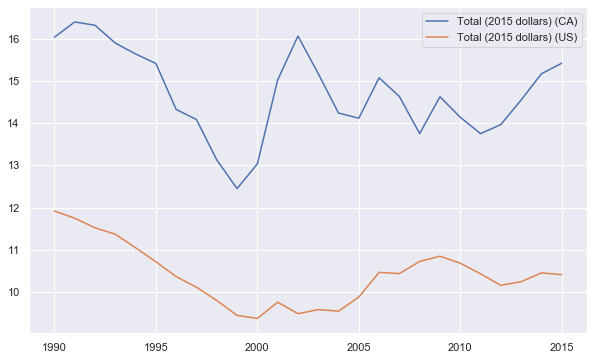

In [72]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(ca_us_pricing[[x for x in ca_us_pricing.columns if '2015 ' in x]])
_ = plt.legend([x for x in ca_us_pricing.columns if '2015 ' in x])

# Annual Revenue CA

In [16]:
ca_revenue = pd.read_csv('../data/california-electricity-capacity/annual-revenue-california.csv')

In [75]:
ca_revenue

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Residential (2015 dollars)
0,2015,CA,Total Electric Industry,15187827,18627081,6394328,75346.0,NaN,40284581,1.518783e+07
1,2014,CA,Total Electric Industry,14517393,18663231,6525678,74025.0,NaN,39780326,1.453506e+07
2,2013,CA,Total Electric Industry,14481054,16597851,6222066,71337.0,NaN,37372308,1.473206e+07
3,2012,CA,Total Electric Industry,13821565,16327164,4925482,49095.0,NaN,35123306,1.426703e+07
4,2011,CA,Total Electric Industry,13060946,16018054,5046467,67248.0,NaN,34192715,1.376181e+07
5,2010,CA,Total Electric Industry,12873565,15863515,4831623,67926.0,NaN,33636629,1.399070e+07
6,2009,CA,Total Electric Industry,13238601,16074664,4985347,70494.0,NaN,34369106,1.462283e+07
7,2008,CA,Total Electric Industry,12594725,15684229,5147103,70695.0,NaN,33496752,1.386711e+07
8,2007,CA,Total Electric Industry,12859833,15854395,5045976,70985.0,NaN,33831189,1.469915e+07
9,2006,CA,Total Electric Industry,12875539,15636088,5145016,55192.0,NaN,33711835,1.513958e+07


# Annual Sales CA

In [17]:
ca_sales = pd.read_csv('../data/california-electricity-capacity/annual-sales-california.csv')

In [79]:
ca_sales.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Business
0,1990,CA,Total Electric Industry,66574670,79691297,55891513,NaN,8935442.0,211092922,144518252
1,1991,CA,Total Electric Industry,66016700,78424653,56191047,NaN,8018089.0,208650489,142633789
2,1992,CA,Total Electric Industry,68121106,80234568,57089510,NaN,8002057.0,213447241,145326135
3,1993,CA,Total Electric Industry,67358692,79058161,56189186,NaN,7893887.0,210499926,143141234
4,1994,CA,Total Electric Industry,68866355,76924502,59863696,NaN,8029749.0,213684302,144817947


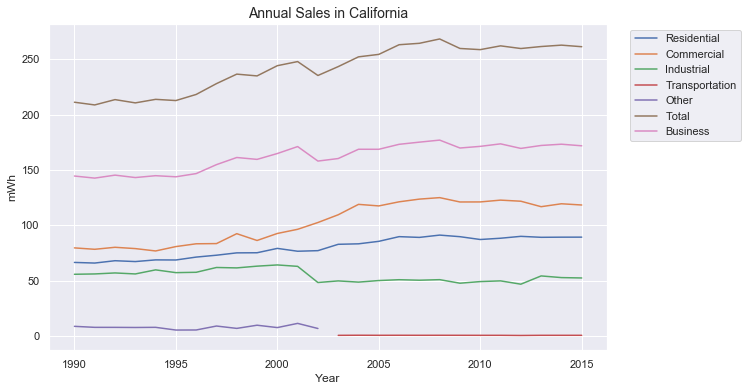

In [92]:
plot_sales = ca_sales.set_index('Year').iloc[:,2:]

_ = plt.figure(figsize=(10,6))
_ = plt.plot(plot_sales / 1000000)
_ = plt.title('Annual Sales in California', size=14)
_ = plt.xlabel('Year')
_ = plt.ylabel('mWh')
_ = plt.legend(plot_sales.columns, bbox_to_anchor=(0.25,0,1,1))

# Plants CA

In [18]:
ca_plants = pd.read_csv('../data/california-electricity-capacity/plants-california.csv')

In [19]:
ca_plants.head()

,year,plant_id,plant_name_gen,operator_name_gen,operator_id_gen,net_generation_mwh,plant_name_cap,operator_name_cap,operator_id_cap,state,nameplate_mw,summer_mw,capacity_mwh,capacity_utilization,minimum_year
0,2001.0,50571.0,Altamont Gas Recovery,WM Renewable Energy LLC,54842.0,38814.0,Altamont Gas Recovery,Bio-Energy Partners,1687.0,CA,6.0,5.80,50808.0,0.763935,1969.0
1,2001.0,50560.0,Pacific-Ultrapower Chinese Station,Constellation Operatg Serv Inc,4172.0,110776.0,Ultrapower Chinese Station,NaN,14367.0,CA,25.0,19.80,173448.0,0.638670,1986.0
2,2001.0,50557.0,TXI Riverside Cement Power House,U S West Financial Service Inc,26940.0,160145.0,TXI Riverside Cement,U S West Financial Service Inc,26940.0,CA,24.0,22.48,196924.8,0.813229,NaN
3,2001.0,50553.0,Edom Hills Project 1 LLC,AE Power Services LLC,55963.0,14851.0,Edom Hill,Southern Calif Sunbelt Devel,17611.0,CA,11.0,5.90,51684.0,0.287342,2008.0
4,2001.0,50632.0,Covanta Stanislaus Energy,Covanta Stanislaus Inc,4498.0,139446.0,Stanislaus Resource Recovery,Covanta Stanislaus Inc,4498.0,CA,24.0,18.00,157680.0,0.884361,1988.0


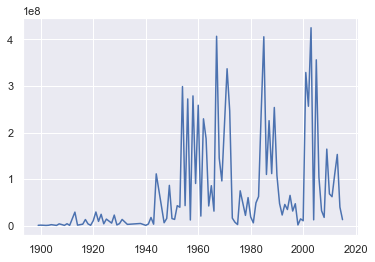

In [98]:
_ = plt.plot(ca_plants.groupby('minimum_year').sum()['capacity_mwh'])

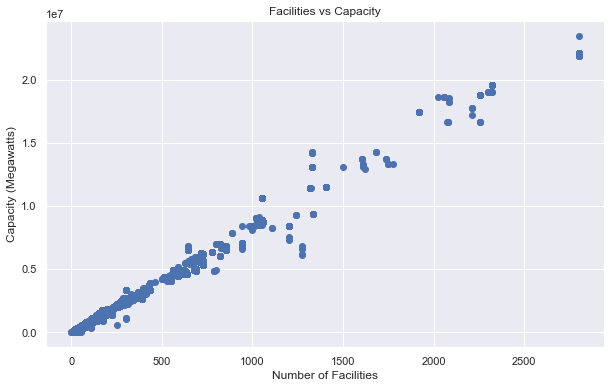

In [20]:
_ = plt.figure(figsize=(10,6))
_ = plt.scatter(x='nameplate_mw', y='capacity_mwh', data=ca_plants)
_ = plt.title('Facilities vs Capacity')
_ = plt.xlabel('Number of Facilities')
_ = plt.ylabel('Capacity (Megawatts)')

# US Plants

In [21]:
plants = pd.read_csv('../data/california-electricity-capacity/plants.csv')

In [22]:
plants.head()

,year,plant_id,plant_name_gen,operator_name_gen,operator_id_gen,net_generation_mwh,plant_name_cap,operator_name_cap,operator_id_cap,state,nameplate_mw,summer_mw,capacity_mwh,capacity_utilization,minimum_year
0,2001.0,2.0,Bankhead Dam,Alabama Power Co,195.0,234987.000,Bankhead Dam,Alabama Power Co,195.0,AL,45.0,56.0,490560.0,0.479018,1963.0
1,2001.0,50573.0,CID Gas Recovery,WM Illinois Renewable Energy LLC,54843.0,39158.001,CID Gas Recovery,Bio-Energy Partners,1687.0,IL,6.0,5.8,50808.0,0.770705,1989.0
2,2001.0,50572.0,CSL Gas Recovery,WM Renewable Energy LLC,54842.0,69691.000,CSL Gas Recovery,Bio-Energy Partners,1687.0,FL,11.2,10.9,95484.0,0.729871,1989.0
3,2001.0,50571.0,Altamont Gas Recovery,WM Renewable Energy LLC,54842.0,38814.000,Altamont Gas Recovery,Bio-Energy Partners,1687.0,CA,6.0,5.8,50808.0,0.763935,1969.0
4,2001.0,50570.0,Chestnut Ridge Gas Recovery,WM Renewable Energy LLC,54842.0,23660.002,Chestnut Ridge Gas Recovery,Bio-Energy Partners,1687.0,TN,3.2,3.2,28032.0,0.844035,1992.0


In [23]:
plants.shape

(90363, 15)

# Renewables

In [24]:
# Import Data
renewable_energy_production = pd.read_csv('../data/california-electricity-capacity/california_renewable_production.csv')

In [25]:
# Object to DateTime
renewable_energy_production['TIMESTAMP'] = pd.to_datetime(renewable_energy_production['TIMESTAMP'])

# Sort by Date
renewable_energy_production = renewable_energy_production.sort_values('TIMESTAMP')

In [26]:
# Rename Variables
renewable_energy_production.columns = ['timestamp','biogas','biomass','geothermal','hour',\
                                       'small_hydro','solar','solar_pv','solar_thermal','wind_total']

In [27]:
renewable_energy_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67584 entries, 12504 to 57119
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      67584 non-null  datetime64[ns]
 1   biogas         67584 non-null  float64       
 2   biomass        67584 non-null  float64       
 3   geothermal     67584 non-null  float64       
 4   hour           67584 non-null  float64       
 5   small_hydro    67584 non-null  float64       
 6   solar          22680 non-null  float64       
 7   solar_pv       44904 non-null  float64       
 8   solar_thermal  44904 non-null  float64       
 9   wind_total     67584 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 5.7 MB


In [28]:
renewable_energy_production.head()

,timestamp,biogas,biomass,geothermal,hour,small_hydro,solar,solar_pv,solar_thermal,wind_total
12504,2010-04-20 00:00:00,170.0,323.0,1056.0,1.0,250.0,0.0,NaN,NaN,632.0
12505,2010-04-20 01:00:00,169.0,318.0,1055.0,2.0,245.0,0.0,NaN,NaN,632.0
12506,2010-04-20 02:00:00,168.0,316.0,1058.0,3.0,240.0,0.0,NaN,NaN,677.0
12507,2010-04-20 03:00:00,168.0,318.0,1063.0,4.0,238.0,0.0,NaN,NaN,923.0
12508,2010-04-20 04:00:00,168.0,318.0,1066.0,5.0,247.0,0.0,NaN,NaN,875.0


In [29]:
days = renewable_energy_production['timestamp'].dt.day
months = renewable_energy_production['timestamp'].dt.month
years = renewable_energy_production['timestamp'].dt.year

# Solar

In [30]:
renewable_energy_production['solar'] = renewable_energy_production['solar'].fillna(renewable_energy_production['solar_pv'] + renewable_energy_production['solar_thermal'])

In [31]:
renewable_energy_production['day'] = renewable_energy_production.timestamp.dt.day

In [32]:
renewable_energy_production.head()

,timestamp,biogas,biomass,geothermal,hour,small_hydro,solar,solar_pv,solar_thermal,wind_total,day
12504,2010-04-20 00:00:00,170.0,323.0,1056.0,1.0,250.0,0.0,NaN,NaN,632.0,20
12505,2010-04-20 01:00:00,169.0,318.0,1055.0,2.0,245.0,0.0,NaN,NaN,632.0,20
12506,2010-04-20 02:00:00,168.0,316.0,1058.0,3.0,240.0,0.0,NaN,NaN,677.0,20
12507,2010-04-20 03:00:00,168.0,318.0,1063.0,4.0,238.0,0.0,NaN,NaN,923.0,20
12508,2010-04-20 04:00:00,168.0,318.0,1066.0,5.0,247.0,0.0,NaN,NaN,875.0,20


# Explore

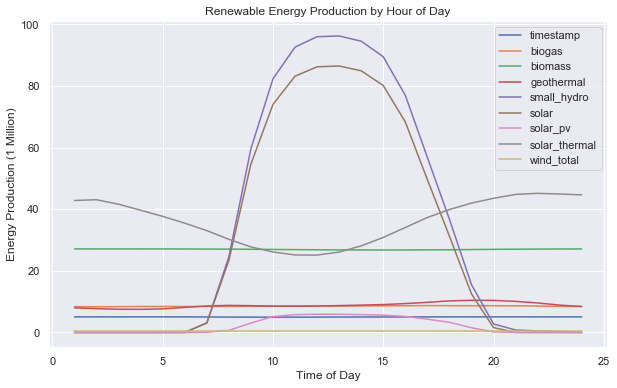

In [33]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(renewable_energy_production.groupby('hour').sum() / 100000)
_ = plt.legend([x for x in renewable_energy_production.columns if x not in ['hour']])
_ = plt.title('Renewable Energy Production by Hour of Day')
_ = plt.xlabel('Time of Day')
_ = plt.ylabel('Energy Production (1 Million)')

In [34]:
def plot_summary(source = 'Solar', col_name='solar'):
    _ = plt.figure(figsize=(12,12))

    plt.subplot(2,2,1)
    _ = plt.plot(renewable_energy_production.groupby('hour').mean()[col_name])
    _ = plt.title(source + ' Production by Hour')
    _ = plt.xlabel('Hour')

    plt.subplot(2,2,2)
    renewable_energy_production.groupby(days).mean()[col_name].plot()
    _ = plt.title(source + ' Production by Day')
    _ = plt.xlabel('Day')

    plt.subplot(2,2,3)
    renewable_energy_production.groupby(months).mean()[col_name].plot()
    _ = plt.title(source + ' Production by Month')
    _ = plt.xlabel('Month')

    plt.subplot(2,2,4)
    renewable_energy_production.groupby(years).mean()[col_name].plot()
    _ = plt.title(source + ' Production by Year')
    _ = plt.xlabel('Year')

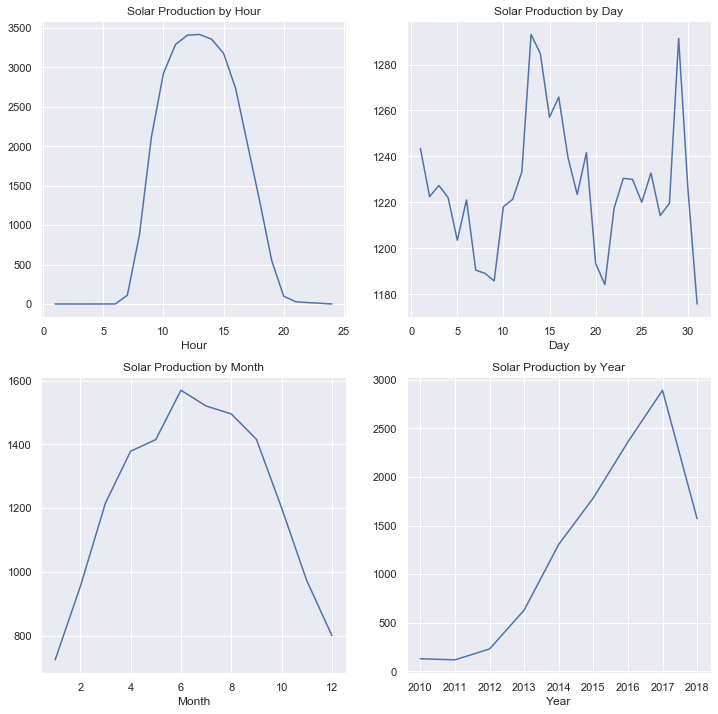

In [35]:
plot_summary()

In [36]:
renewable_energy_production.head()

,timestamp,biogas,biomass,geothermal,hour,small_hydro,solar,solar_pv,solar_thermal,wind_total,day
12504,2010-04-20 00:00:00,170.0,323.0,1056.0,1.0,250.0,0.0,NaN,NaN,632.0,20
12505,2010-04-20 01:00:00,169.0,318.0,1055.0,2.0,245.0,0.0,NaN,NaN,632.0,20
12506,2010-04-20 02:00:00,168.0,316.0,1058.0,3.0,240.0,0.0,NaN,NaN,677.0,20
12507,2010-04-20 03:00:00,168.0,318.0,1063.0,4.0,238.0,0.0,NaN,NaN,923.0,20
12508,2010-04-20 04:00:00,168.0,318.0,1066.0,5.0,247.0,0.0,NaN,NaN,875.0,20


# Correlations by Month

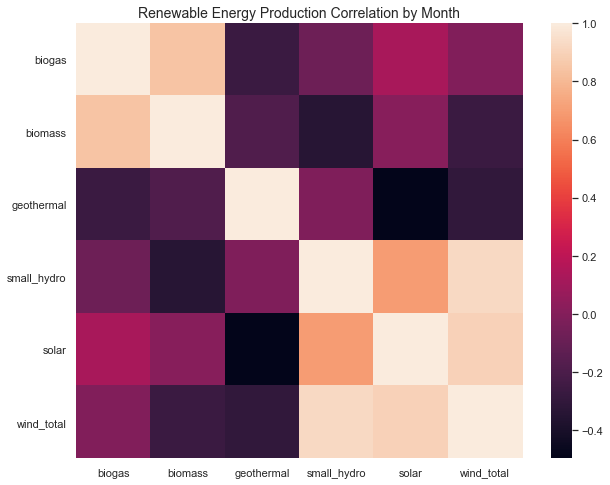

In [17]:
_ = plt.figure(figsize=(10,8))
_ = sns.heatmap(renewable_energy_production.drop(['day','hour','solar_pv','solar_thermal'],1).groupby([months]).mean().corr())
_ = plt.title('Renewable Energy Production Correlation by Month', size=14)
_ = plt.yticks(rotation=0)

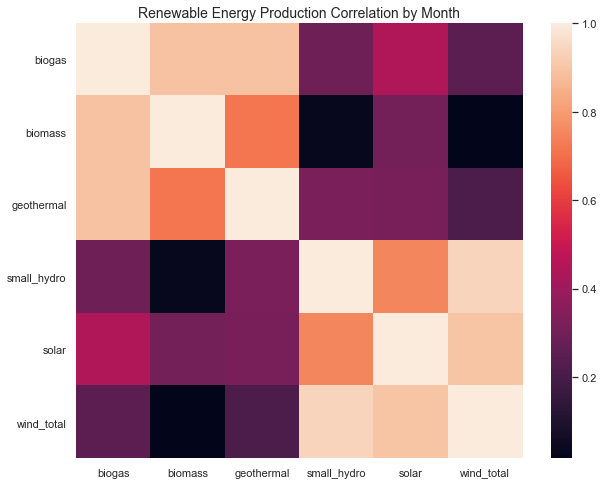

In [18]:
_ = plt.figure(figsize=(10,8))
_ = sns.heatmap(renewable_energy_production.drop(['day','hour','solar_pv','solar_thermal'],1).groupby([months]).sum().corr())
_ = plt.title('Renewable Energy Production Correlation by Month', size=14)
_ = plt.yticks(rotation=0)

# Correlations by Hour

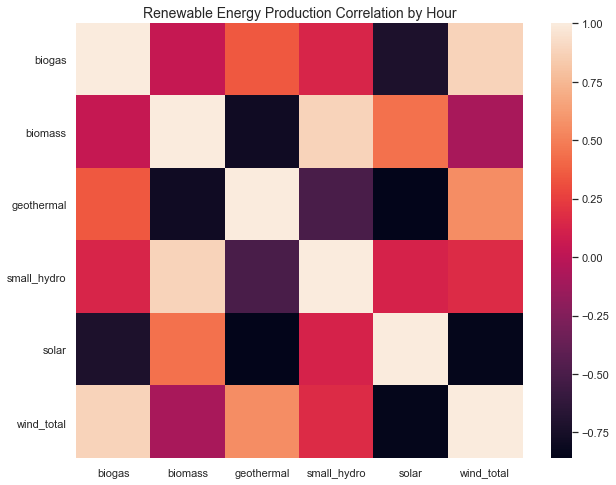

In [19]:
_ = plt.figure(figsize=(10,8))
_ = sns.heatmap(renewable_energy_production.drop(['day','solar_pv','solar_thermal'],1).groupby('hour').mean().corr())
_ = plt.title('Renewable Energy Production Correlation by Hour', size=14)
_ = plt.yticks(rotation=0)

## PV vs Thermal

In [32]:
#
SOLAR_COLS = ['timestamp','solar_pv','solar_thermal']

#
solar_pv_thermal = renewable_energy_production[renewable_energy_production['solar'].isna()][SOLAR_COLS]

In [33]:
solar_pv_thermal.max()

timestamp       NaN
solar_pv        NaN
solar_thermal   NaN
dtype: float64

In [22]:
solar_pv_thermal.head()

,timestamp,solar_pv,solar_thermal


In [23]:
days = solar_pv_thermal['timestamp'].dt.day
months = solar_pv_thermal['timestamp'].dt.month
years = solar_pv_thermal['timestamp'].dt.year

solar_pv_thermal_days = solar_pv_thermal.groupby([years, months, days]).sum()
solar_pv_thermal_months = solar_pv_thermal.groupby([years, months]).sum()
solar_pv_thermal_years = solar_pv_thermal.groupby([years]).sum()

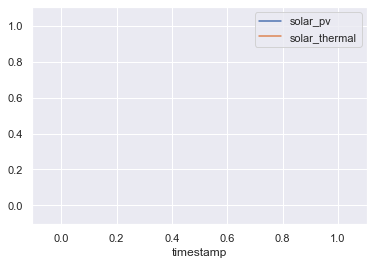

In [24]:
solar_pv_thermal_years.plot()

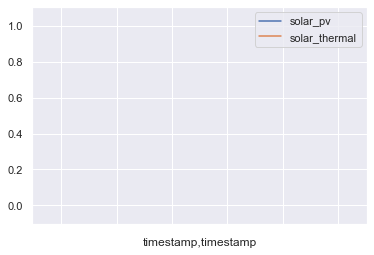

In [25]:
solar_pv_thermal_months.plot()

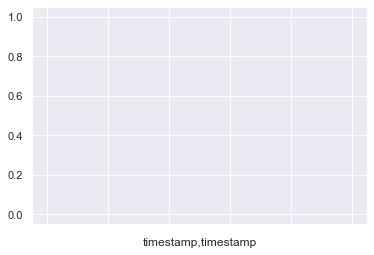

In [26]:
renewable_energy_production.groupby([years, months]).sum()['wind_total'].plot()
_ = plt.xticks(rotation=45)

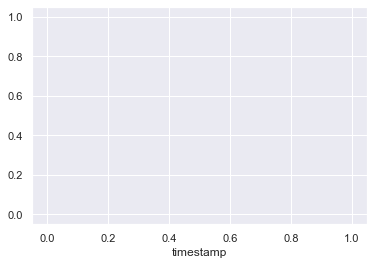

In [27]:
renewable_energy_production.groupby([years]).sum()['wind_total'].plot()

In [39]:
file_names

['../data/california-electricity-capacity\\annual-capacity-california.csv',
 '../data/california-electricity-capacity\\annual-customers-california.csv',
 '../data/california-electricity-capacity\\annual-price-california-vs-usa.csv',
 '../data/california-electricity-capacity\\annual-revenue-california.csv',
 '../data/california-electricity-capacity\\annual-sales-california.csv',
 '../data/california-electricity-capacity\\california_renewable_production.csv',
 '../data/california-electricity-capacity\\cali_energy_capacity.ipynb',
 '../data/california-electricity-capacity\\plants-california.csv',
 '../data/california-electricity-capacity\\plants.csv']

In [40]:
pd.read_csv('../data/california-electricity-capacity/annual-capacity-california.csv')

,Year,State Code,Producer Type,Fuel Source,Generators,Facilities,Nameplate Capacity (Megawatts),Summer Capacity (Megawatts)
0,1990,CA,Total Electric Power Industry,All Sources,NaN,739.0,55025.84,53215.03
1,1991,CA,Total Electric Power Industry,All Sources,NaN,731.0,55293.64,53444.40
2,1992,CA,Total Electric Power Industry,All Sources,NaN,748.0,55284.19,53696.18
3,1993,CA,Total Electric Power Industry,All Sources,NaN,753.0,56054.06,54405.14
4,1994,CA,Total Electric Power Industry,All Sources,NaN,758.0,55250.53,53456.43
5,1995,CA,Total Electric Power Industry,All Sources,NaN,751.0,55288.23,53488.98
6,1996,CA,Total Electric Power Industry,All Sources,NaN,751.0,55965.47,54156.33
7,1997,CA,Total Electric Power Industry,All Sources,NaN,736.0,55711.85,53858.06
8,1998,CA,Total Electric Power Industry,All Sources,NaN,730.0,54488.82,52373.32
9,1999,CA,Total Electric Power Industry,All Sources,NaN,717.0,54460.14,52171.22
